### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
import seaborn as sns
import sklearn

In [10]:
import warnings
warnings.filterwarnings('ignore')

source: https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/

### Data

In [2]:
cars = sns.load_dataset('mpg').dropna()

### Ridge graph

In [ ]:
years = sorted(cars['model_year'].unique())
distribution = [cars[cars['model_year'] == year]['weight'] for year in years]

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Weight')
ax.set_ylabel('Yaer')
ax.set_xlim(cars['weight'].min(), cars['weight'].max())
ax.set_ylim(min(years)-1, max(years)+1)
ax.set_yticks(np.arange(min(years), max(years)+1))

ax.

plt.show()

### test

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

In [6]:
data = pd.read_csv("mock-european-test-results.csv")
data.head()

,country,age,sex,score
0,Spain,22,female,0.71
1,Italy,19,male,0.18
2,Ireland,21,female,0.45
3,Spain,19,female,0.45
4,Italy,21,female,0.60


C:\Users\User\AppData\Local\Temp\ipykernel_7184\3298389132.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


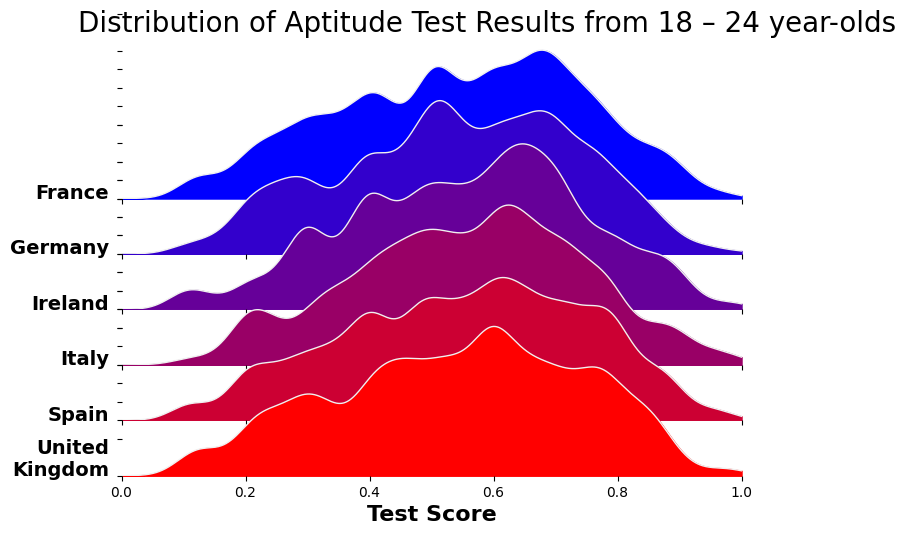

In [9]:
# nazwy krajów
countries = [x for x in np.unique(data.country)]
# kolory dla poszczególnych histogramów
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

gs = grid_spec.GridSpec(len(countries),1)
fig = plt.figure(figsize=(8, 6))

i = 0

ax_objs = []
for country in countries:
    country = countries[i]
    x = np.array(data[data.country == country].score)
    x_d = np.linspace(0,1, 1000)

    kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

        # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    ax_objs[-1].set_ylim(0,2.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(countries)-1:
        ax_objs[-1].set_xlabel("Test Score", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = country.replace(" ","\n")
    ax_objs[-1].text(-0.02,0,adj_country,fontweight="bold",fontsize=14,ha="right")


    i += 1

gs.update(hspace=-0.7)

fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds", fontsize=20)

plt.tight_layout()
plt.show()